In [1]:
import pandas as pd
import numpy as np

In [2]:
reviews = pd.read_csv('./hb.csv')
reviews.shape

(272216, 3)

In [3]:
reviews.head()

,Rating (Star),Review,URL
0,5,3 yıldır tık demedi. :),https://www.hepsiburada.com/logitech-m175-kabl...
1,5,3 yıldır kullanıyorum müthiş,https://www.hepsiburada.com/logitech-m175-kabl...
2,4,Ürün bugün elime geçti çok fazla inceleme fırs...,https://www.hepsiburada.com/logitech-m175-kabl...
3,4,Almaya karar verdim. Hemencecik geldi. Keyifle...,https://www.hepsiburada.com/logitech-m175-kabl...
4,5,Günlük kullanımınızı çok çok iyi karsılıyor kı...,https://www.hepsiburada.com/logitech-m175-kabl...


In [4]:
reviews.describe()

,Rating (Star)
count,272216.000000
mean,4.382527
std,0.952845
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [5]:
print(reviews['Rating (Star)'].value_counts())

5    167427
4     62394
3     28719
1      7226
2      6450
Name: Rating (Star), dtype: int64


In [6]:
print(reviews['Rating (Star)'].value_counts(normalize=True).head())

5    0.615052
4    0.229208
3    0.105501
1    0.026545
2    0.023694
Name: Rating (Star), dtype: float64


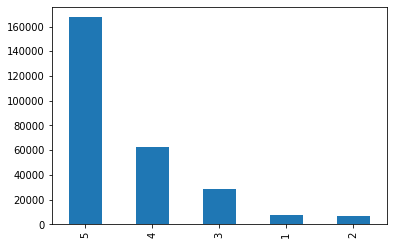

In [14]:
reviews['Rating (Star)'].value_counts().plot(kind='bar')

In [8]:
reviews.groupby('Rating (Star)').describe()

Review                                                       \
                count  unique                                     top freq   
Rating (Star)                                                                
1                7226    6132  Ürün kırık geldi çok üzüldüm açıkcası     9   
2                6450    5892                              İdare eder   14   
3               28719   25896                                     iyi   57   
4               62394   56733                                     iyi  142   
5              167427  146618                                 Çok iyi  276   

                  URL         \
                count unique   
Rating (Star)                  
1                7226   1345   
2                6450   1333   
3               28719   1896   
4               62394   1968   
5              167427   2115   

                                                                        
                                                             top  freq  
Rating (Star)                                                           
1              https://www.hepsiburada.com/prima-bebek-bezi-a...   118  
2              https://www.hepsiburada.com/nokia-5800-xpressm...    63  
3              https://www.hepsiburada.com/prima-bebek-bezi-a...   243  
4              https://www.hepsiburada.com/nokia-5800-xpressm...   748  
5              https://www.hepsiburada.com/xiaomi-mi-band-2-a...  2151

In [9]:
reviews['length'] = reviews['Review'].apply(len)
reviews.head()

,Rating (Star),Review,URL,length
0,5,3 yıldır tık demedi. :),https://www.hepsiburada.com/logitech-m175-kabl...,23
1,5,3 yıldır kullanıyorum müthiş,https://www.hepsiburada.com/logitech-m175-kabl...,29
2,4,Ürün bugün elime geçti çok fazla inceleme fırs...,https://www.hepsiburada.com/logitech-m175-kabl...,512
3,4,Almaya karar verdim. Hemencecik geldi. Keyifle...,https://www.hepsiburada.com/logitech-m175-kabl...,59
4,5,Günlük kullanımınızı çok çok iyi karsılıyor kı...,https://www.hepsiburada.com/logitech-m175-kabl...,59


In [10]:
reviews.groupby('Rating (Star)').describe()

length                                                   \
                  count        mean         std  min   25%    50%    75%   
Rating (Star)                                                              
1                7226.0  178.946997  153.033013  3.0  78.0  145.0  228.0   
2                6450.0  200.204186  166.525425  3.0  98.0  166.0  248.0   
3               28719.0  178.797973  157.068062  3.0  79.0  151.0  221.0   
4               62394.0  180.774273  161.764579  3.0  77.0  157.0  222.0   
5              167427.0  156.445973  161.942946  3.0  55.0  117.0  199.0   

                       
                  max  
Rating (Star)          
1              1994.0  
2              1995.0  
3              2012.0  
4              2000.0  
5              2058.0

In [11]:
reviews[reviews['length'] == 2058]['Review'].iloc[0]

'Neden Burner ? &#8226;&#9;Formülasyondaki HCA (Hidroksisitrik asit) sayesinde,alınan kalorileri yağ üretiminden ziyade, glikozun depolanmış şekli olan glikojen üretiminin arttırılmasına yönlendirerek,iştah arzusunu ve enerji seviyelerini etkilemeye, &#8226;&#9;Karbonhidratlardan yağ asidi sentezlenmesini engellemeye ve sağlıklı bir şekilde kandaki lipid seviyesini yükseltmeye, &#8226;&#9;Organizmaya genel bir uyarı sağlayarak, kalbin ritmini bozmadan vücuda zindelik ve huzur vermeye, zekayı açmaya, &#8226;&#9;Metobolizmayı uyarmaya, arındırmaya ve toksin gidermeye, &#8226;&#9;Organizmadaki sıvı atılımını kolaylaştırarak, böbreklerin işlevini değiştirmeden temizlemeye,kafein molekülleri sayesinde &#8216;&#8217;yağ çözücü&#8217;&#8217; trigiliserid lipid enzimin aktivitesine etki ederek lipolizi yani yağ çözünmesini uyarmaya, &#8226;&#9;Diyetteki ruhsal yorgunluğa etki için sinir sistemini düzenlemeye yardım etmeye, &#8226;&#9;Daha etkin bir yağ oksidasyonu sağlayarak, daha çok kalori y

In [12]:
import scipy as sp
from sklearn.feature_extraction.text import CountVectorizer


vect = CountVectorizer()
vect.fit(reviews.Review)
vect.get_feature_names()
reviews_trns=vect.transform(reviews.Review)
reviews_trns.toarray()
new=pd.DataFrame(reviews_trns.toarray(), columns=vect.get_feature_names())

In [13]:
new.head()

,00,000,0000,00003,0000btu,000btu,000de,000e,000km,000kmde,...,şıçrıyor,şığı,şığında,şşallah,şşeyi,şşimdi,şşimdiye,şşiriyor,şşmdi,şşşşşşşş
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
